In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.getcwd())
# Any results you write to the current directory are saved as output.

C:\Users\gnost


In [2]:
# Read in the training and testing data
training_df = pd.read_csv('Datasets/titanic_train.csv', index_col='PassengerId')
testing_df = pd.read_csv('Datasets/titanic_test.csv', index_col='PassengerId')

# Getting relevant information about dtypes and any missing values
print(training_df.info())
print(testing_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       33

In [3]:
# Extract meaning from 'Cabin' column to get which deck the passenger was on
# Checking data type of 'Cabin' column first
print(training_df.Cabin.dtype)

# Chaninging the 'Cabin' column into a string
training_df = training_df.astype({'Cabin':'str'})
testing_df = testing_df.astype({'Cabin':'str'})

# Defining a function to get the first character of a non NaN string
def get_first(string):
    if string != 'nan':
        return string[0]
    else:
        return 'NaN'

# Getting the first letter of each cabin to make a Deck column
training_df['Deck'] = training_df['Cabin'].apply(get_first)
print(training_df.Deck.value_counts())
testing_df['Deck'] = testing_df['Cabin'].apply(get_first)


# Only one 'T' deck cabin, merits investigation
print(training_df[training_df['Deck']=='T'])

# A quick google search of Stephen Weart Blackwell showed him having a cabin on the "boat" deck

# T deck is not present in the test set, so the 'Deck' column needs to have its category set
from pandas.api.types import CategoricalDtype
decks = ['NaN', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
cat_decks = CategoricalDtype(categories=decks)
training_df.Deck = training_df.Deck.astype(cat_decks)
testing_df.Deck = testing_df.Deck.astype(cat_decks)
testing_df.Deck.dtype

object
NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Deck, dtype: int64
             Survived  Pclass                          Name   Sex   Age  \
PassengerId                                                               
340                 0       1  Blackwell, Mr. Stephen Weart  male  45.0   

             SibSp  Parch  Ticket  Fare Cabin Embarked Deck  
PassengerId                                                  
340              0      0  113784  35.5     T        S    T  


CategoricalDtype(categories=['NaN', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], ordered=False)

In [4]:
# Combining the sibling, spouse, parents, and children into a 'Family' column
def sum_family(df):
    df['Family'] = df['SibSp'] + df['Parch']

sum_family(training_df)
sum_family(testing_df)

print(training_df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked Deck  \
PassengerId                                                                
1                1      0         A/5 21171   7.2500   

In [5]:
# Dropping unnecessary columns
cols_to_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
training_df.drop(columns=cols_to_drop, inplace=True)
testing_df.drop(columns=cols_to_drop, inplace=True)

print(training_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck',
       'Family'],
      dtype='object')


In [6]:
# Generate dummy columns for non-numeric data
training_dummies = pd.get_dummies(training_df, drop_first=True)
print(training_dummies.head())

testing_dummies = pd.get_dummies(testing_df, drop_first=True)
print(testing_dummies.head())

             Survived  Pclass   Age     Fare  Family  Sex_male  Embarked_Q  \
PassengerId                                                                  
1                   0       3  22.0   7.2500       1         1           0   
2                   1       1  38.0  71.2833       1         0           0   
3                   1       3  26.0   7.9250       0         0           0   
4                   1       1  35.0  53.1000       1         0           0   
5                   0       3  35.0   8.0500       0         1           0   

             Embarked_S  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  \
PassengerId                                                               
1                     1       0       0       0       0       0       0   
2                     0       0       0       1       0       0       0   
3                     1       0       0       0       0       0       0   
4                     1       0       0       1       0       0       0   
5  

Text(0.5, 0.98, 'Chance of Survival')

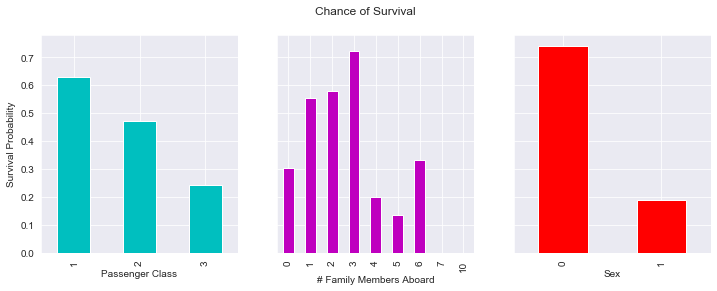

In [7]:
# Running some statistical tests on the data to examine relationships
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Plotting survival rate for each of Pclass, Family, and Sex
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
training_dummies.groupby('Pclass').Survived.mean().plot(ax=ax1, kind='bar', color='c')
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Survival Probability')
training_dummies.groupby('Family').Survived.mean().plot(ax=ax2, kind='bar', color='m')
ax2.set_xlabel('# Family Members Aboard')
training_dummies.groupby('Sex_male').Survived.mean().plot(ax=ax3, kind='bar', color='r')
ax3.set_xlabel('Sex')
plt.suptitle('Chance of Survival')

# These graphs show an increased chance of survival for passengers who are female, have a few family members with them aboard, and a 'higher' passenger class


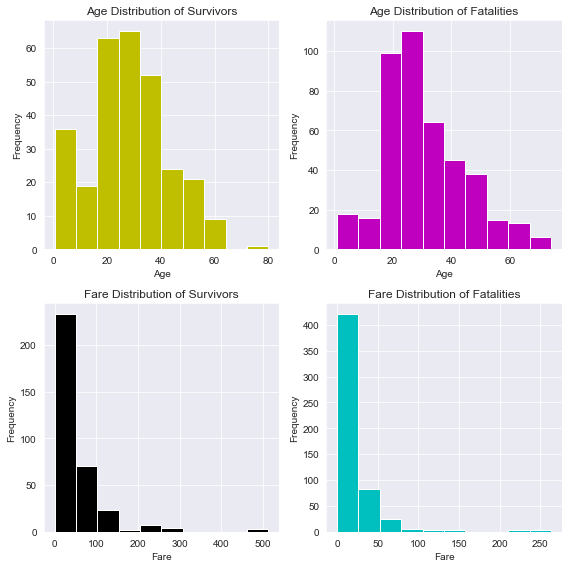

In [8]:
# Examining Age and Fare with histograms
# Separating the columns by survival to visualize trends in who survived
age_survived = training_dummies.Age[training_dummies['Survived']==1]
age_died = training_dummies.Age[training_dummies['Survived']==0]
fare_survived = training_dummies.Fare[training_dummies['Survived']==1]
fare_died = training_dummies.Fare[training_dummies['Survived']==0]

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
age_survived.plot(kind='hist', ax=axs[0,0], color='y')
axs[0,0].set_xlabel('Age')
axs[0,0].set_title('Age Distribution of Survivors')

age_died.plot(kind='hist', ax=axs[0,1], color='m')
axs[0,1].set_xlabel('Age')
axs[0,1].set_title('Age Distribution of Fatalities')

fare_survived.plot(kind='hist', ax=axs[1,0], color='k')
axs[1,0].set_xlabel('Fare')
axs[1,0].set_title('Fare Distribution of Survivors')

fare_died.plot(kind='hist', ax=axs[1,1], color='c')
axs[1,1].set_xlabel('Fare')
axs[1,1].set_title('Fare Distribution of Fatalities')

plt.tight_layout()

# The distribution of ages look pretty similar, so not much information gained there
# The distribution of fare has vastly different scales and the survivors show how paying more for a ticket could point toward a higher survival rate

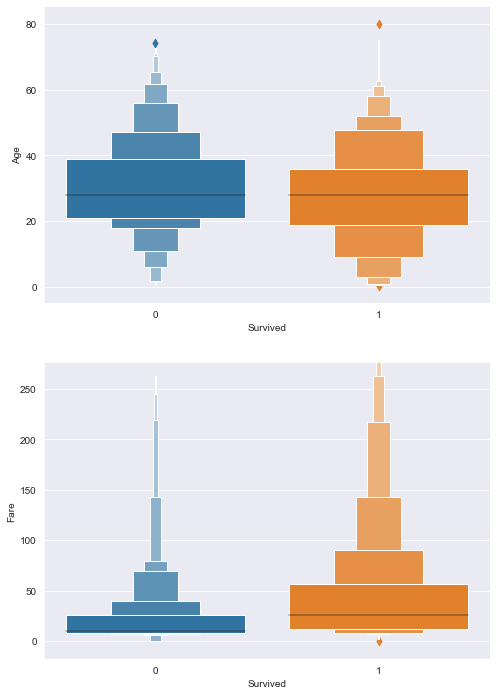

In [9]:
# Since the scale was so off on the fare histograms, I decided later a boxenplot would better show the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,12))
sns.boxenplot(x='Survived', y='Age', data=training_dummies, ax=ax1)
sns.boxenplot(x='Survived', y='Fare', data=training_dummies, ax=ax2)

# These plots more clearly show how age didn't have much of a difference, just a smaller trend towards younger passengers surviving a little more
# The fare plots do show a relationship between paying more for the ticket and having a higher chance of survival

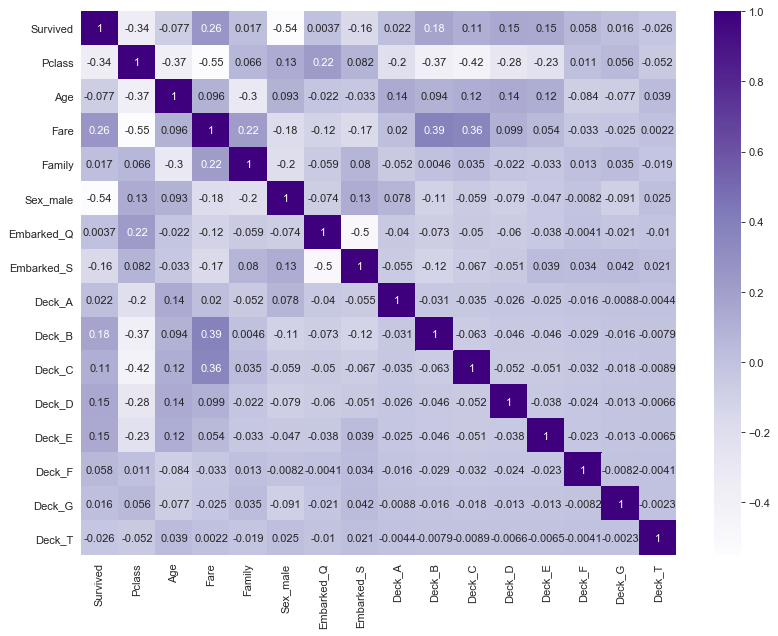

In [10]:
# Creating a heatmap to display covariance between columns
training_cov = training_dummies.corr()
plt.figure(figsize=(12,9), dpi=80)
sns.heatmap(training_cov, cmap='Purples', annot=True)

# The survived row shows a slight negative correlation between Pclass and survival, which points to the lower class numbers or 'higher class' having higher survival
# There is also a slight positive correlation beween fare and survival, telling a similar story to the previous point
# Also decks B-E may have had some positive influence on survival, but not much
# Embarking from Southhampton may have had some negative influence on survival, but not much
# There is a fairly strong negative correlation between being male and surviving, pointing towards more women surviving
# The heatmap does not show any correlation between family size and survival, but this does not describe how the chance of survival rose from 0-3 then fell if there were more than 3 members of a family

In [11]:
# Splitting the survived target column from the features
y = training_dummies.Survived
X = training_dummies.drop(columns='Survived')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Train test split to evaluate model accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Need to impute the missing values of the Age column, filling with the median age of passengers
X_train['Age'] = X_train.Age.fillna(X_train.Age.median())
X_test['Age'] = X_test.Age.fillna(X_train.Age.median())
testing_dummies['Age'] = testing_dummies.Age.fillna(X_train.Age.median())

# It is necessary to scale the Age and Fare columns so their larger values don't throw off the model
std_scaler = StandardScaler()
X_train[['Age', 'Fare']] = std_scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = std_scaler.transform(X_test[['Age', 'Fare']])
testing_dummies[['Age', 'Fare']] = std_scaler.transform(testing_dummies[['Age', 'Fare']])


C:\Users\gnost\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\gnost\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\gnost\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [12]:
# Building a model
import tensorflow as tf

# Building a create model function to tune optimizer and activation hyperparameters
def create_model(optimizer='adam', activation='relu'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation=activation, input_shape=(15,)))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import GridSearchCV

model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=5, batch_size=32)
params = dict(optimizer=['adam', 'sgd', 'RMSprop'], activation=['relu', 'tanh'])
grid_search = GridSearchCV(model, param_grid=params, cv=4)
grid_search_results = grid_search.fit(X, y)

print(grid_search_results.best_score_, grid_search_results.best_params_)
# Results showed the best optimizer as Adam, and the best activation as relu


C:\Users\gnost\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gnost\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gnost\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gnost\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\gnost\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gnost\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gnost\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gnost\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
668/668 [==============================] - 0s 113us/sample - loss: nan - acc: 0.6123
Epoch 2/5
668/668 [==============================] - 0s 27us/sample - loss: nan - acc: 0.6048
Epoch 3/5
668/668 [==============================] - 0s 25us/sample - loss: nan - acc: 0.6048
Epoch 4/5
668/668 [==============================] - 0s 21us/sample - loss: nan - acc: 0.6048
Epoch 5/5
223/223 [==============================] - 0s 85us/sample - loss: nan - acc: 0.6502
Epoch 1/5
668/668 [==============================] - 0s 96us/sample - loss: nan - acc: 0.6123
Epoch 2/5
668/668 [==============================] - 0s 22us/sample - loss: nan - acc: 0.6332
Epoch 3/5
668/668 [==============================] - 0s 21us/sample - loss: nan - acc: 0.6332
Epoch 4/5
668/668 [==============================] - 0s 21us/sample - loss: nan - acc: 0.6332
Epoch 5/5
223/223 [==============================] - 0s 81u

In [18]:
from sklearn.model_selection import RandomizedSearchCV

# Now tuning nodes and layers
def build_model(nmlrs=1, nodes=16):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(15,)))
    for i in range(nmlrs):
        model.add(tf.keras.layers.Dense(nodes, activation='tanh'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=10, batch_size=32)
params = dict(nmlrs=[2, 3, 4, 5, 6], nodes=[32, 64, 228, 256, 512])
random_search = RandomizedSearchCV(model, param_distributions=params, cv=4)
random_search_results = random_search.fit(X, y)

print(random_search_results.best_score_, random_search_results.best_params_)
# Running several combinations of number of layers and number of nodes, 3 layers and 256 nodes was the best combination

Epoch 1/10
668/668 [==============================] - 1s 2ms/sample - loss: nan - acc: 0.6048
Epoch 2/10
668/668 [==============================] - 0s 261us/sample - loss: nan - acc: 0.6048
Epoch 3/10
668/668 [==============================] - 0s 261us/sample - loss: nan - acc: 0.6048
Epoch 4/10
668/668 [==============================] - 0s 264us/sample - loss: nan - acc: 0.6048
Epoch 5/10
668/668 [==============================] - 0s 260us/sample - loss: nan - acc: 0.6048
Epoch 6/10
668/668 [==============================] - 0s 270us/sample - loss: nan - acc: 0.6048
Epoch 7/10
668/668 [==============================] - 0s 272us/sample - loss: nan - acc: 0.6048
Epoch 8/10
668/668 [==============================] - 0s 261us/sample - loss: nan - acc: 0.6048
Epoch 9/10
668/668 [==============================] - 0s 258us/sample - loss: nan - acc: 0.6048
Epoch 10/10
223/223 [==============================] - 1s 4ms/sample - loss: nan - acc: 0.6502
Epoch 1/10
668/668 [=======================

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 17s 24ms/sample - loss: 0.6044 - acc: 0.6840 - val_loss: 0.5525 - val_acc: 0.7207
Epoch 2/100
712/712 [==============================] - 0s 532us/sample - loss: 0.4962 - acc: 0.7669 - val_loss: 0.4849 - val_acc: 0.7821
Epoch 3/100
712/712 [==============================] - 0s 521us/sample - loss: 0.4712 - acc: 0.7893 - val_loss: 0.4780 - val_acc: 0.7709
Epoch 4/100
712/712 [==============================] - 0s 527us/sample - loss: 0.4453 - acc: 0.7963 - val_loss: 0.4554 - val_acc: 0.7989
Epoch 5/100
712/712 [==============================] - 0s 438us/sample - loss: 0.4388 - acc: 0.7963 - val_loss: 0.4878 - val_acc: 0.7765
Epoch 6/100
712/712 [==============================] - 0s 531us/sample - loss: 0.4464 - acc: 0.8020 - val_loss: 0.4517 - val_acc: 0.8101
Epoch 7/100
712/712 [==============================] - 0s 455us/sample - loss: 0.4385 - acc: 0.8034 - val_loss: 0.4661 - val_acc: 0.

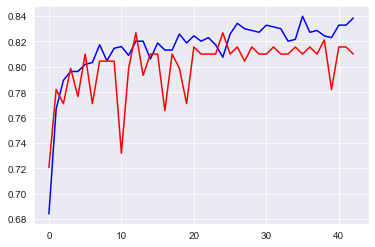

In [21]:
# Now building the best model for traning
best_model = tf.keras.Sequential()
best_model.add(tf.keras.layers.Dense(32, activation='tanh', input_shape=(15,)))
for i in range(3):
    best_model.add(tf.keras.layers.Dense(256, activation='tanh'))
best_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define an early stopping montior
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=30)

# Checkpoint the model we wish to save
model_save = tf.keras.callbacks.ModelCheckpoint('Documents/Data Science Portfolio/Titanic Survival/titanic_best_model.hdf5', save_best_only=True)

# Setting a history of the model tuning to watch for overfitting
# Using the train test split from prior to validate model
history = best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                         callbacks=[early_stopping, model_save])

plt.figure()
plt.plot(history.history['acc'], c='b')
plt.plot(history.history['val_acc'], c='r')
plt.show()

In [15]:
preds = best_model.predict(testing_dummies)
preds = np.round(preds)
submission_keras = pd.DataFrame()
submission_keras['PassengerID'] = testing_df.index
submission_keras['Survived'] = preds
submission_keras.to_csv('Documents/Data Science Portfolio/Titanic Survival/titanic_keras_submission.csv')